<a href="https://colab.research.google.com/github/mdzikrim/Hands-on_DL/blob/main/Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA + Random Forest

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

# Load MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Split 60k train, 10k test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)


In [2]:
start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
end = time.time()

y_pred = rf_clf.predict(X_test)
print("Accuracy (tanpa PCA):", accuracy_score(y_test, y_pred))
print("Training time (tanpa PCA):", round(end - start, 2), "detik")


Accuracy (tanpa PCA): 0.9674
Training time (tanpa PCA): 55.73 detik


In [3]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print("Dimensi setelah PCA:", X_train_reduced.shape[1])


Dimensi setelah PCA: 154


In [4]:
start = time.time()
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_reduced, y_train)
end = time.time()

y_pred_pca = rf_pca.predict(X_test_reduced)
print("Accuracy (setelah PCA):", accuracy_score(y_test, y_pred_pca))
print("Training time (dengan PCA):", round(end - start, 2), "detik")


Accuracy (setelah PCA): 0.9487
Training time (dengan PCA): 163.71 detik


##t-SNE Visualization

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ambil 2000 sampel untuk visualisasi
X_subset, y_subset = X[:2000], y[:2000]

# Jalankan t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_subset)


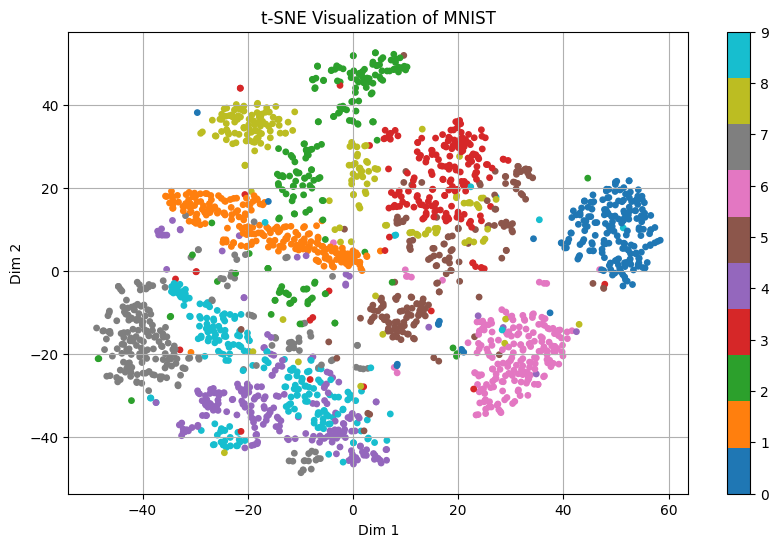

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap="tab10", s=15)
plt.title("t-SNE Visualization of MNIST")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(scatter)
plt.grid(True)
plt.show()
